<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/%D0%A3%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BD%D0%B0%20IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя знания данного урока, и набор данных IMDB вам необходимо:
1. Спроектировать модель классификации отзывов к фильмам с точностью на валидационной выборке более 90%.
2. Показать, что модель способна классифицировать отзывы с вероятностью более 88% на контрольной выборке.

За успешное выполнение задания вы получите 3 балла. Если сможете преодолеть точность 95% на валидационной выборке и/или 93% на контрольной, то получите 4 балла.

Также вы можете получить дополнительно 1 балл, если выполните все предложенные задания в задаче о Титанике (17.1), проанализируете "увеличенную модель" (17.2).

In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=19000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
def vectorize_sequences(sequences, dimension=19000):
    results = np.zeros((len(sequences), dimension)) # Создаем нулевой вектор с размерностью 10000!
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Записываем единицы в элемент с данным индексом
    return results

x_train = vectorize_sequences(train_data) # Векторизуем обучающие данные
x_test  = vectorize_sequences(test_data)  # Векторизуем контрольные данные

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train[0])

1.0


In [35]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(19000,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.1))



model.add(layers.Dense(1, activation='sigmoid'))

EPOCHS = 15
BATCH_SIZE = 256
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.005)

Epoch 1/15
98/98 [==============================] - 3s 17ms/step - loss: 0.4869 - accuracy: 0.7843 - val_loss: 0.2722 - val_accuracy: 0.8960
Epoch 2/15
98/98 [==============================] - 1s 6ms/step - loss: 0.2627 - accuracy: 0.9076 - val_loss: 0.2039 - val_accuracy: 0.9040
Epoch 3/15
98/98 [==============================] - 1s 6ms/step - loss: 0.1808 - accuracy: 0.9407 - val_loss: 0.1861 - val_accuracy: 0.9040
Epoch 4/15
98/98 [==============================] - 1s 6ms/step - loss: 0.1241 - accuracy: 0.9625 - val_loss: 0.1846 - val_accuracy: 0.9120
Epoch 5/15
98/98 [==============================] - 1s 6ms/step - loss: 0.0850 - accuracy: 0.9757 - val_loss: 0.2061 - val_accuracy: 0.9040
Epoch 6/15
98/98 [==============================] - 1s 6ms/step - loss: 0.0595 - accuracy: 0.9836 - val_loss: 0.2261 - val_accuracy: 0.9040
Epoch 7/15
98/98 [==============================] - 1s 6ms/step - loss: 0.0428 - accuracy: 0.9888 - val_loss: 0.2200 - val_accuracy: 0.9440
Epoch 8/15
98/98 [=

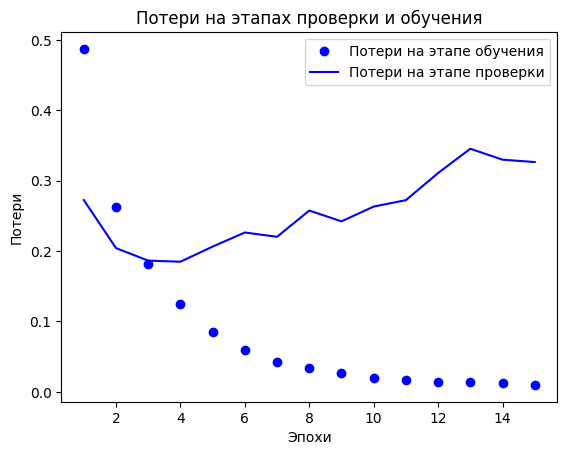

In [36]:
history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Точность на этапе обучения = 99.7 %
Точность на этапе проверки = 93.6 %



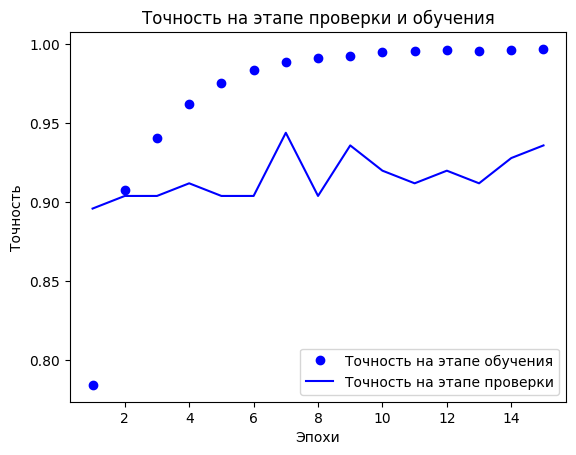

In [37]:
print(f"Точность на этапе обучения = {round((history_dict['accuracy'][-1]*100), 1)} %")
print(f"Точность на этапе проверки = {round((history_dict['val_accuracy'][-1]*100), 1)} %")
print()
plt.clf() # Очистить рисунок
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Точность на этапе обучения')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Точность на этапе проверки')
plt.title('Точность на этапе проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()